# Proyek Analisis Data: BIKE SHARING DATASET (DAY)
- **Nama:** [RAGIL GIGIH UTOMO]
- **Email:** [Imfirst48@gmail.com]
- **ID Dicoding:** [ragil_giggs]

## Menentukan Pertanyaan Bisnis

- pada season apakah jumlah penyewaan sepeda paling banyak?
- apakah weathersit berpengaruh terhadap banyaknya penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df=pd.read_csv('\submission\data\day.csv')

**Insight:**
- I'm using the day.csv dataset 

### Assessing Data

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

I'm using the head() method to see the first 5 of the dataset and as we can see theres 16 column

In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**

in this code I'm using isnull() method to see if theres any missing value and using sum method to summarize the missing value but as we can see there is nothing missing value in the dataset

In [5]:
df.duplicated().sum()

0

**Insight:**
in this code i'm using duplicated method to see if there's any duplicated data in the dataset and the result is 0 

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insigt:**
- in this next code i'm using describe method to find some description about every column of the dataset such as count, mean, std, min, max, etc.

### Cleaning Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- in this code above i'm using info method into the dataset to see information about the data types and the missing value and there's no missing value on the dataset but i found one wrong data types in the dataset, it's the dteday column where it's hold a datetime value so the data type should be datetime.

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])

**Insight:**
- so first because i'm about to change just the dteday column data type so i'm just call the dteday column and then using the pandas library i'm using the to_datetime method to change the data type of the dteday column and then after the data type is converted i'm putting the result to the same column

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


**Insight**
- correlation method was used so we can know which parameter are correlating with other parameter and if it positif it's right and negatif is left and the bigger the number mean it's more correlating

In [10]:
season=df.groupby('season')['cnt'].sum().reset_index()
season

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


**Insight**
- to answer the first question we use the groupby method to group the season and we call the cnt parameter because we only need that parameter for the result and we summarize it based on their season also we reset the index as well and as we can see in the result that season 3 has the highest cnt while season 1 is the lowest

In [11]:
weather=df.groupby('weathersit')['cnt'].mean().reset_index()
weather

,weathersit,cnt
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


**Insight:**
- same as the season but now we group the data based on the weathersit and again we only call the cnt parameter because we only need that as the result  also unlike in the season we use mean here to make it logically fair and after that we also reset the index, and the result as we can see weathersit 3 has the lowest while weathersit 1 is the highest

## Visualization & Explanatory Analysis

### Pertanyaan 1:

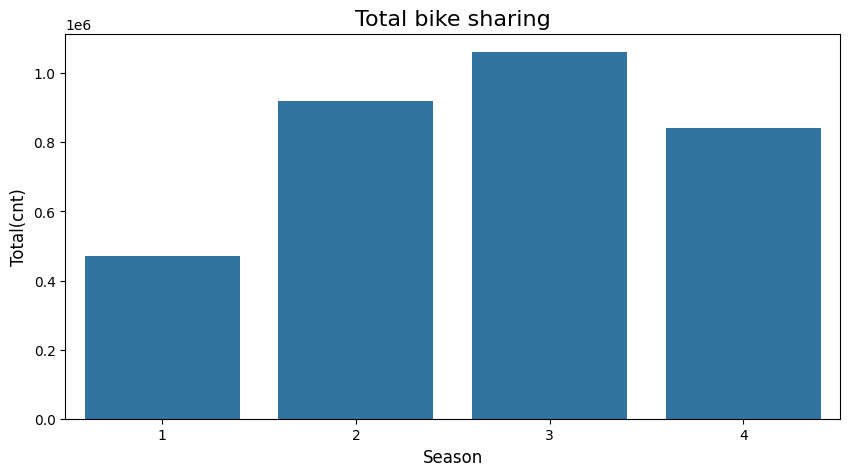

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=season)
plt.title('Total bike sharing', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total(cnt)', fontsize=12)
plt.show()

### Pertanyaan 2:

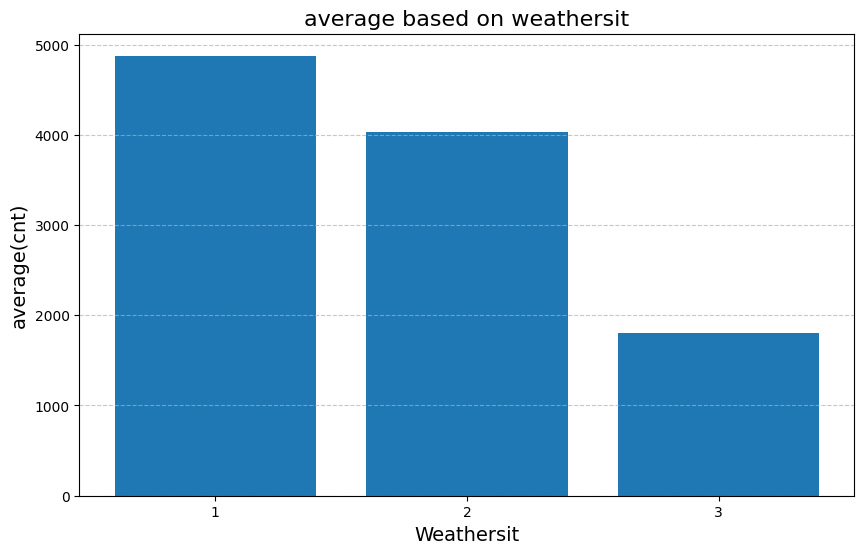

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(weather['weathersit'].astype(str), weather['cnt'])
plt.title('average based on weathersit', fontsize=16)
plt.xlabel('Weathersit', fontsize=14)
plt.ylabel('average(cnt)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- start with sizing the chart into 10x5 and then make the chart using sns library where we using 2 parameter season and cnt from the season data and then giving the title and giving the x and y name and then showing it
- on the second visualisation i start with sizing where im sizing it into 10x6 then we make the chart in this im also using bar chart where there will be 2 parameter its weathersit and cnt and then using title and sizing it into 16 and giving the x and y label and than i add grid method with some parameter just for decoration

In [14]:
df.to_csv('\submission\dashboard\main_data.csv')

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : as we can see in the first bar chart the third season has the highest 'renting' rate with more then a million in total while seaason one has the lowest renting rate with under 500k in total so to overcome this problem we need to see what probalby happen in the season 3 and analyze it again.
- Conclution pertanyaan 2 : as we can see in the second bar chart that the weathersit is affecting the renting because where it's 1 (sunny?) it get the most renting count and then 2 (cloudy?) it's decreasing a bit and the last is 3 (rain?) has the lowest of course people don't want to get wet in the rain because cycling so to overcome this problem maybe it's a need to put a rain coat at every bike so people would be willing to use the bike even when it's raining.